In [10]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
import os
import cv2
from PIL import Image
from imutils import paths
# CATTRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/train/cats'
# DOGTRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/train/dogs'
# CLASSES = ['Dog','Cat']
TRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/train'
CLASSES = os.listdir(TRAIN_PATH)
print(CLASSES)

['cats', 'dogs']


In [2]:
# def loaddata(datapath):
#     imagepaths = list(paths.list_images(datapath))
#     data = []
#     for imagepath in imagepaths:
#       image = cv2.imread(imagepath)
#       image = cv2.resize(image,(150,150))
#       data.append(image)
#     return np.array(data,dtype="float32")

# #loading images
# DOGS = loaddata(DOGTRAIN_PATH)
# CATS = loaddata(CATTRAIN_PATH)
from tensorflow.keras.utils import image_dataset_from_directory
train_data = image_dataset_from_directory(TRAIN_PATH,image_size=(150,150),subset = 'training',seed=1,validation_split = 0.1,batch_size = 32)
test_data = image_dataset_from_directory(TRAIN_PATH,image_size=(150,150),subset = 'validation',seed=1,validation_split = 0.1,batch_size = 32)

Found 2000 files belonging to 2 classes.
Using 1800 files for training.
Found 2000 files belonging to 2 classes.
Using 200 files for validation.


In [25]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 512)               89719296  
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                      

In [26]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
model_train= model.fit(train_data,
          epochs=10,
          validation_data=test_data)

Epoch 1/10
57/57 [==============================] - 8s 107ms/step - loss: 488.6081 - accuracy: 0.5272 - val_loss: 5.6336 - val_accuracy: 0.6350
Epoch 2/10
57/57 [==============================] - 8s 130ms/step - loss: 3.3546 - accuracy: 0.7222 - val_loss: 4.4926 - val_accuracy: 0.6200
Epoch 3/10
57/57 [==============================] - 8s 122ms/step - loss: 0.8924 - accuracy: 0.8556 - val_loss: 4.0724 - val_accuracy: 0.5800
Epoch 4/10
57/57 [==============================] - 8s 112ms/step - loss: 0.2836 - accuracy: 0.9311 - val_loss: 2.9352 - val_accuracy: 0.6600
Epoch 5/10
57/57 [==============================] - 8s 128ms/step - loss: 0.0976 - accuracy: 0.9794 - val_loss: 2.3836 - val_accuracy: 0.6300
Epoch 6/10
57/57 [==============================] - 7s 111ms/step - loss: 0.0539 - accuracy: 0.9917 - val_loss: 3.1599 - val_accuracy: 0.6300
Epoch 7/10
57/57 [==============================] - 8s 126ms/step - loss: 0.0124 - accuracy: 0.9983 - val_loss: 3.0682 - val_accuracy: 0.6350
Epoc

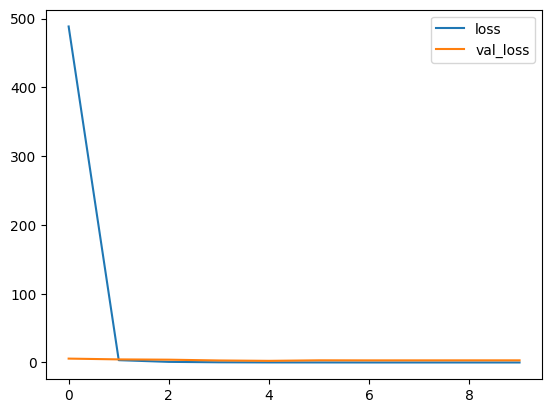

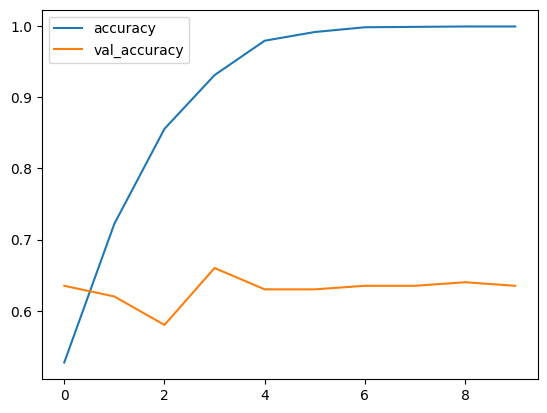

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
model_train_df = pd.DataFrame(model_train.history)
model_train_df.loc[:, ['loss', 'val_loss']].plot()
model_train_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 18ms/step
[[1.3241755e-08]]
cat


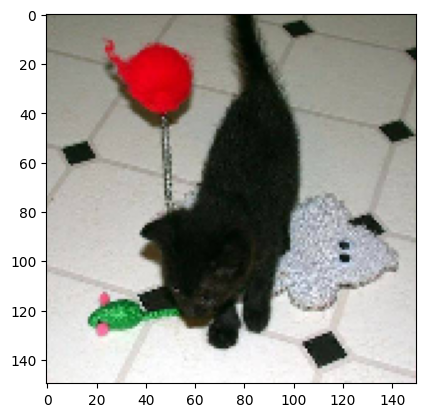

In [31]:
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/validation/cats/cat.2002.jpg',target_size=(150,150))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)


result = model.predict(test_image)

#Mapping result array with the main name list
i=0
print(result)
if(result>=0.5):
  print("dog")
else:
  print("cat")